In [258]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob

In [259]:
df = pd.read_csv("/Users/nstk/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [260]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Task 1 Merge all 12 months of sales data into a single CSV file

In [261]:
all_months_data = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith(".csv"):
        all_months_data = all_months_data.append(pd.read_csv(file))
all_months_data.to_csv("all_data_copy.csv", index = False)

In [262]:
all_data = pd.read_csv("all_data.csv")

In [263]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# What was the best month for sales? How much sales was earned that month?

In [264]:
#find nan in rows

In [265]:
all_data.isna().values.sum()

3270

In [266]:
drop_nan = all_data[all_data.isna().any(axis = 1)]
drop_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


# drop nan from rows

In [267]:
all_data = all_data.dropna(how = "all")
all_data.head(10)
#df.dropna(how='all')  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


# adding month column

In [268]:
#ther are "Or" in order date column, therefore we cannot extract month from all "Order Date", drop "Or" words

temp_df =all_data[all_data["Order Date"].str[0:2] == "Or"]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [269]:
## dropping "Or" from "Order Date" column

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [270]:
pd.options.mode.chained_assignment = None

all_data["month"] = all_data["Order Date"].str[0:2]
all_data["month"] = all_data["month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# What was the best month for sales? How much was earned that month?

In [271]:
# go an ERROR : can't multiply sequence by non-int of type 'str' 
# therefore convert Quantity ordered and Price each to int

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [272]:
 #finally i can find total sales for each month !!

all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [273]:
## finding the best month of sales

result = all_data.groupby("month").sum()
result

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [274]:
all_data.groupby("month").max()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
month,,,,,,,
1,319366,iPhone,7,1700.0,01/31/19 23:35,"999 Walnut St, San Francisco, CA 94016",1999.98
2,162008,iPhone,7,1700.0,02/28/19 23:59,"999 Wilson St, New York City, NY 10001",1700.00
3,176557,iPhone,7,1700.0,03/31/19 23:46,"999 Sunset St, Los Angeles, CA 90001",1700.00
4,194094,iPhone,7,1700.0,04/30/19 23:49,"999 Pine St, Boston, MA 02215",3400.00
5,209920,iPhone,7,1700.0,05/31/19 23:49,"999 Wilson St, Portland, OR 97035",3400.00
6,222909,iPhone,9,1700.0,06/30/19 23:56,"999 Wilson St, San Francisco, CA 94016",3400.00
7,236669,iPhone,9,1700.0,07/31/19 23:43,"999 Willow St, Seattle, WA 98101",1700.00
8,248150,iPhone,8,1700.0,08/31/19 23:57,"999 Sunset St, San Francisco, CA 94016",1700.00
9,259357,iPhone,6,1700.0,09/30/19 23:59,"999 Wilson St, Los Angeles, CA 90001",1700.00


# visualize data using matplotlib

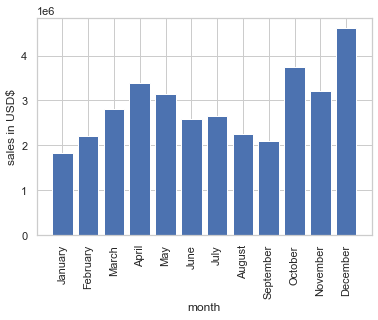

In [276]:
import matplotlib.pyplot as plt
import calendar
month=[calendar.month_name[i] for i in range(1,13)]


plt.bar(month, result["Sales"])
plt.xticks(month, rotation = "vertical")

plt.xlabel("month")
plt.ylabel("sales in USD$")
plt.show()


# Question 2 : What city had the highest number of sales? 


In [277]:
#add a city column first

In [278]:
#df['DataFrame Column'].dtypes
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
Sales               float64
dtype: object

In [279]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [284]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x : get_city(x) + " (" + get_state(x) + ")")

In [285]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [286]:
#now answering question 2 "the city with highest sales"


In [292]:
results = all_data.groupby("City").sum()

In [293]:
results

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


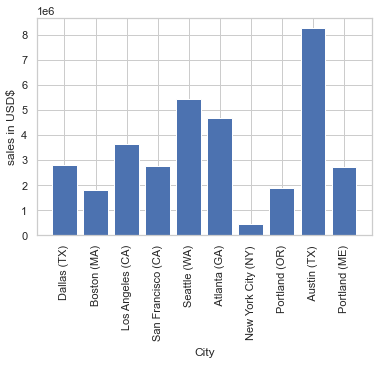

In [289]:
import matplotlib.pyplot as plt
import calendar

cities = all_data["City"].unique()


plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation = "vertical")

plt.xlabel("City")
plt.ylabel("sales in USD$")
plt.show()

# Question 3 What time should we display advertisements to maximise likelihood of customer's buying product? 

In [295]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [299]:
## convert order date using datetime library

all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [300]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [301]:
#add new column Hour

all_data["Hour"] = all_data["Order Date"].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [302]:
#add new column Minute
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


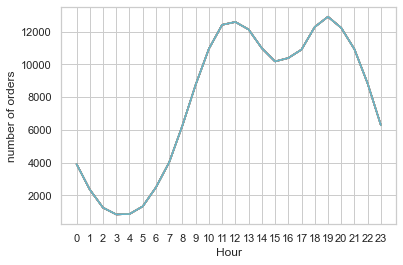

In [311]:
#pd.options.mode.chained_assignment = None

hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count())
all_data.groupby(["Hour"]).count()
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("number of orders")
plt.show()

# Question 4 What products are most often sold together?

In [310]:
all_data.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [312]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [335]:
#count all duplicate order id, which product are sold together the most ?

# finding duplicated items

duplicate_df = all_data[all_data["Order ID"].duplicated(keep = False)]
duplicate_df.head()

#google phone and wired headphone are sold together in the same order id 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [336]:
#df.assign(lastname=df.groupby('id')['lastname'].ffill()).drop_duplicates('id', keep='last')

#out=df.groupby('ID',as_index=False).agg({'Number':list,'Address':'first'})
#out=out.join(pd.DataFrame(out.pop('Number').tolist()).rename(columns=lambda x:f"Number{x+1}"))




In [337]:
duplicate_df["Grouped"] = duplicate_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
duplicate_df.head()

#product with same order id are now grouped together

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [340]:
duplicate_df = duplicate_df[["Order ID", "Grouped"]].drop_duplicates()

In [341]:
duplicate_df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [342]:
duplicate_df.tail()

,Order ID,Grouped
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,"Google Phone,USB-C Charging Cable"


In [344]:
#using new libraries 
#counting unique pairs of numbers into a python dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
print(count)



Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [345]:
#top 20 the most sold pair

count.most_common(20)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

In [350]:
#find which three pair are the most sold

count = Counter()
for row in duplicate_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 3)))
print(count)

Counter({('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62, ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47, ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35, ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33, ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27, ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24, ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16, ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4, ('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 3, ('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'): 3, ('iPhone', 'Lightning Charging Cable', 'AA Batteries (4

In [352]:
#the most common sold three pair

count.most_common(20)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5),
 (('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'),
  4),
 (('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'), 3),
 (('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'), 3),
 (('iPhone', 'Light

# Question 5 What product sold the most? why do you think it sold the most? 

In [353]:
product_group = all_data.groupby("Product")
product_group.sum()

,Quantity Ordered,Price Each,month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [355]:
quantity_ordered = product_group.sum()["Quantity Ordered"]
quantity_ordered.sum()

209079

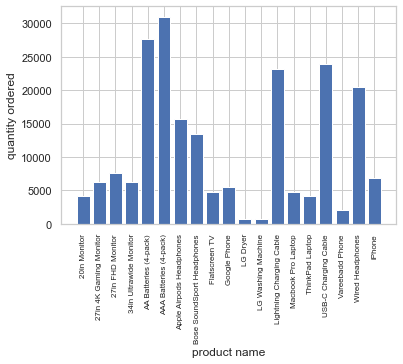

In [359]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = "vertical", size = 8)

plt.xlabel("product name")
plt.ylabel("quantity ordered")
plt.show()

#AAA batteries are sold the most 

In [360]:
prices = all_data.groupby("Product").mean()["Price Each"]
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


In [361]:
#fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
#ax1.plot(x, y1, 'g-')
#ax2.plot(x, y2, 'b-')

#ax1.set_xlabel('X data')
#ax1.set_ylabel('Y1 data', color='g')
#ax2.set_ylabel('Y2 data', color='b')

#plt.show()

/var/folders/7l/_0l4_zxn0fxb4nlbsqlfn92w0000gn/T/ipykernel_24363/4251772195.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


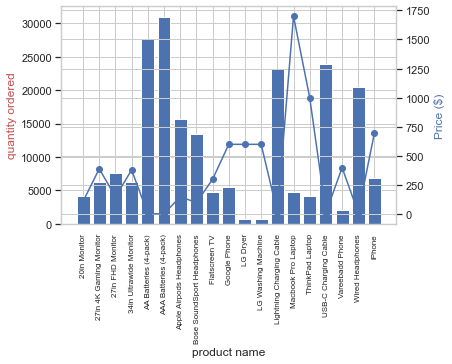

In [373]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'o-')

ax1.set_xlabel("product name")
ax1.set_ylabel("quantity ordered", color = "r")

ax2.set_ylabel("Price ($)", color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()